<a href="https://colab.research.google.com/github/bindukovvada/Loan_Default_Prediction_Assignment/blob/main/Loan_Default_Prediction_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement :

A person’s creditworthiness is often associated (conversely) with the likelihood they may default on loans. 

We’re giving you anonymized data on about 1000 loan applications, along with a certain set of attributes about the applicant itself, and whether they were considered high risk.

0 = Low credit risk i.e high chance of paying back the loan amount

1 = High credit risk i.e low chance of paying back the loan amount

#Import all necessary libraries

In [ ]:
#Installing package
!pip install pandas-profiling==2.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-optimize 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as ltb

from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
import time
from math import sqrt
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from skopt.space import Real, Categorical, Integer


#Load the dataset 

In [ ]:
#Connect with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/applicant.csv')
df2 = pd.read_csv('/content/drive/MyDrive/loan.csv')

In [ ]:
#Merge two datasets
df = pd.merge(df1,df2)

In [ ]:
#Storing target column into a variable 
Dependent_variable = df['high_risk_applicant']

#Data Engineering & Modelling

##Finding Missing Values

In [ ]:
#Finding sum of null values
df.isnull().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
loan_application_id                     

A few columns have missing values. Some columns have more than 50% missing values.  So we can remove such columns.


In [ ]:
#These two columns have been removed because the majority of the values are null. 
df.drop('Telephone',axis=1,inplace=True)
df.drop('Other_EMI_plans',axis=1,inplace=True)

Two columns have been removed because the majority of the values are null.

Some other columns are not useful to predict, so we can remove them.

In [ ]:
df.drop('Has_been_employed_for_at_least',axis=1,inplace=True) #This information is included in Has been employed for at most column.
df.drop('Balance_in_existing_bank_account_(lower_limit_of_bucket)',axis=1,inplace=True) #This information is included in Balance_in_existing_bank_account_(upper_limit_of_bucket)column.
df.drop('loan_application_id',axis=1,inplace=True) #Has all uniques values 

In [ ]:
df.drop('applicant_id',axis=1,inplace=True) #Has all uniques values 

##Since the majority of null values are categorical, replacing null values with mode

In [ ]:
def treat_nulls(df):
  for col in df.columns:
    if df[col].isnull().sum()!=0:
      df[col] = df[col].fillna(df[col].mode().iloc[0])
  return 

treat_nulls(df)

In [ ]:
df.isnull().sum()

Primary_applicant_age_in_years                              0
Gender                                                      0
Marital_status                                              0
Number_of_dependents                                        0
Housing                                                     0
Years_at_current_residence                                  0
Employment_status                                           0
Has_been_employed_for_at_most                               0
Foreign_worker                                              0
Savings_account_balance                                     0
Balance_in_existing_bank_account_(upper_limit_of_bucket)    0
Months_loan_taken_for                                       0
Purpose                                                     0
Principal_loan_amount                                       0
EMI_rate_in_percentage_of_disposable_income                 0
Property                                                    0
Has_coap

#Convert Categorical columns into numerical columns using Encoding Techniques

Label Encoding on few column which have multiple values

In [ ]:
from sklearn import preprocessing
from sklearn. preprocessing import LabelEncoder
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
df['Employment_status'] = labelEncoder.fit_transform(df['Employment_status'])
df['Has_been_employed_for_at_most'] = labelEncoder.fit_transform(df['Has_been_employed_for_at_most'])
df['Purpose'] = labelEncoder.fit_transform(df['Purpose'])
df['Property'] = labelEncoder.fit_transform(df['Property'])
df['Loan_history'] = labelEncoder.fit_transform(df['Loan_history'])
df['Savings_account_balance'] = labelEncoder.fit_transform(df['Savings_account_balance'])

One hot Encoding on other columns which have binary values

In [ ]:
#One hot encoder on Gender
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(df[['Gender','Marital_status','Housing','Balance_in_existing_bank_account_(upper_limit_of_bucket)']]).toarray())
names=enc.get_feature_names_out()
enc_data.columns=names
df3=df.join(enc_data)


Observation -

We can see that all columns have been numerically converted.

Now, We are removing the encoded columns.

In [ ]:
#Removing features after Encoding
df3.drop('Balance_in_existing_bank_account_(upper_limit_of_bucket)',axis=1,inplace=True)
df3.drop('Gender',axis=1,inplace=True)
df3.drop('Marital_status',axis=1,inplace=True)
df3.drop('Housing',axis=1,inplace=True)

In [ ]:
#Checking shape after adding/removing features
df3.shape

(1000, 28)

Now we have 1000 rows and 26 columns

In [ ]:
#Data after Encoding
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Primary_applicant_age_in_years                                  1000 non-null   int64  
 1   Number_of_dependents                                            1000 non-null   int64  
 2   Years_at_current_residence                                      1000 non-null   int64  
 3   Employment_status                                               1000 non-null   int64  
 4   Has_been_employed_for_at_most                                   1000 non-null   int64  
 5   Foreign_worker                                                  1000 non-null   int64  
 6   Savings_account_balance                                         1000 non-null   int64  
 7   Months_loan_taken_for                               

In [ ]:
#Once again checking the duplicates
duplicate = df3[df3.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Primary_applicant_age_in_years, Number_of_dependents, Years_at_current_residence, Employment_status, Has_been_employed_for_at_most, Foreign_worker, Savings_account_balance, Months_loan_taken_for, Purpose, Principal_loan_amount, EMI_rate_in_percentage_of_disposable_income, Property, Has_coapplicant, Has_guarantor, Number_of_existing_loans_at_this_bank, Loan_history, high_risk_applicant, Gender_female, Gender_male, Marital_status_divorced/separated, Marital_status_divorced/separated/married, Marital_status_married/widowed, Marital_status_single, Housing_for free, Housing_own, Housing_rent, Balance_in_existing_bank_account_(upper_limit_of_bucket)_0, Balance_in_existing_bank_account_(upper_limit_of_bucket)_2 lac]
Index: []

[0 rows x 28 columns]


No Duplicates found in this dataset.

### Checking distribution of all the features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  after removing the cwd from sys.path.


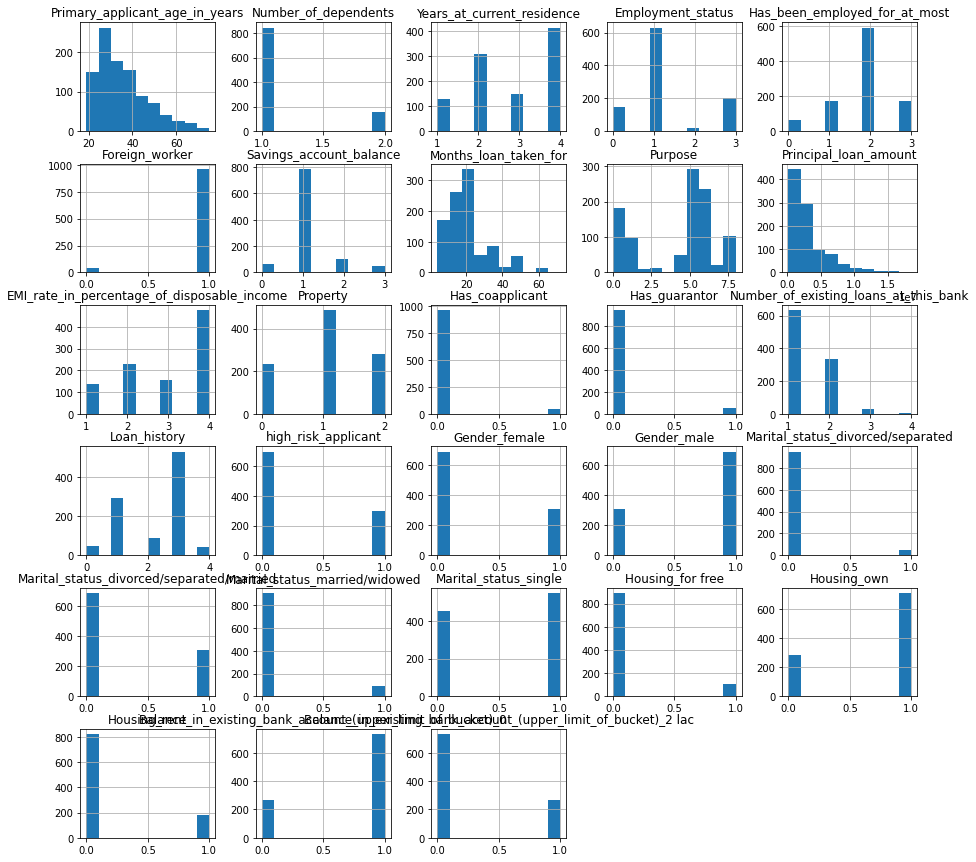

In [ ]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(data=df3,ax=ax)
plt.tight_layout()

Using log transformation to normalise the data

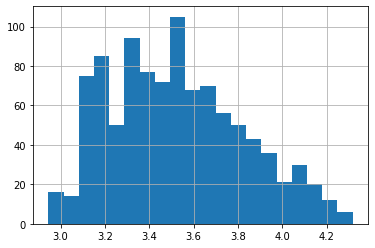

In [ ]:
df3['Primary_applicant_age_in_years']=np.log(df3['Primary_applicant_age_in_years'])
df3['Primary_applicant_age_in_years'].hist(bins=20)

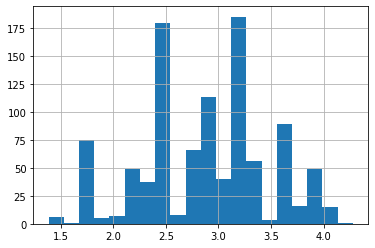

In [ ]:
df3['Months_loan_taken_for']=np.log(df3['Months_loan_taken_for'])
df3['Months_loan_taken_for'].hist(bins=20)

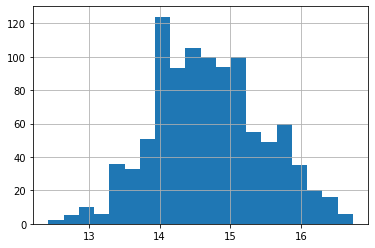

In [ ]:
df3['Principal_loan_amount']=np.log(df3['Principal_loan_amount'])
df3['Principal_loan_amount'].hist(bins=20)

We have now normalised the data.

##Let's Check the Outliers

In [ ]:
#checking the outliers
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1

((df3 < (Q1 - 1.5 * IQR)) | (df3 > (Q3 + 1.5 * IQR))).sum()

Primary_applicant_age_in_years                                      0
Number_of_dependents                                              155
Years_at_current_residence                                          0
Employment_status                                                 370
Has_been_employed_for_at_most                                     408
Foreign_worker                                                     37
Savings_account_balance                                           214
Months_loan_taken_for                                               7
Purpose                                                             0
Principal_loan_amount                                               1
EMI_rate_in_percentage_of_disposable_income                         0
Property                                                            0
Has_coapplicant                                                    41
Has_guarantor                                                      52
Number_of_existing_l

Blox plot to see outliers for each column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

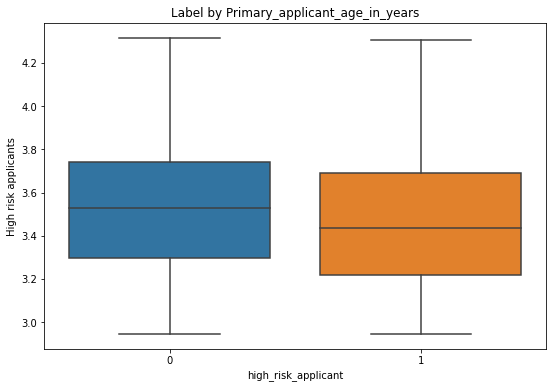

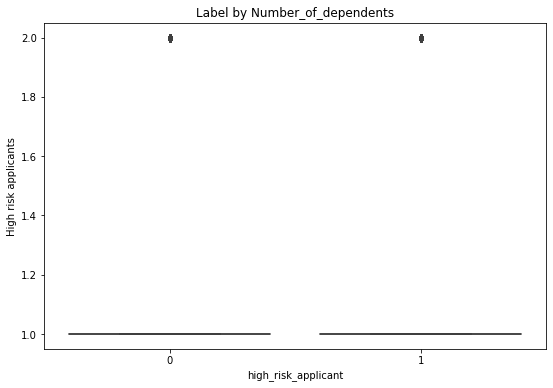

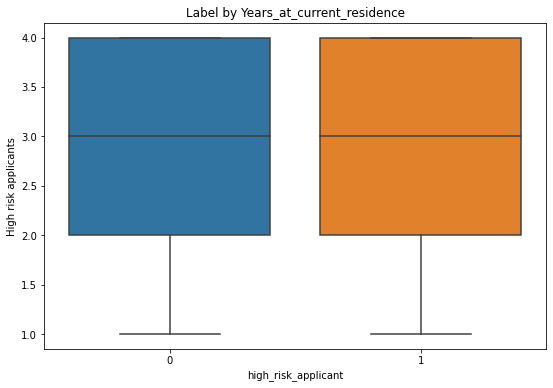

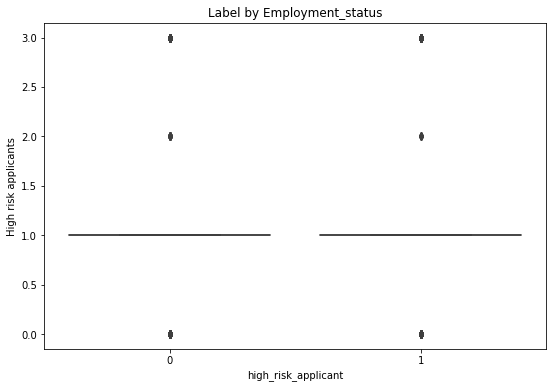

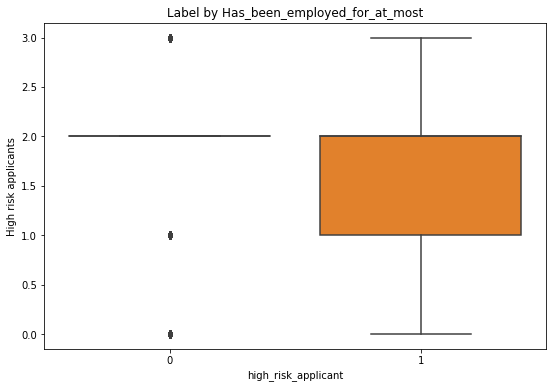

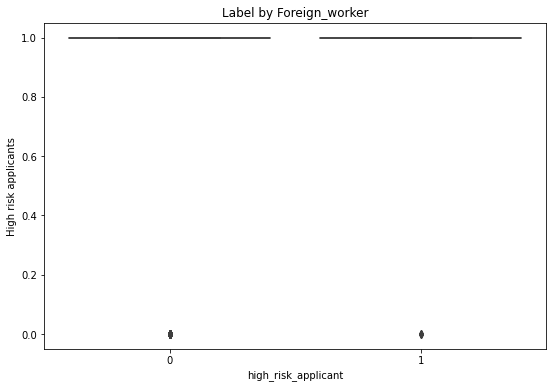

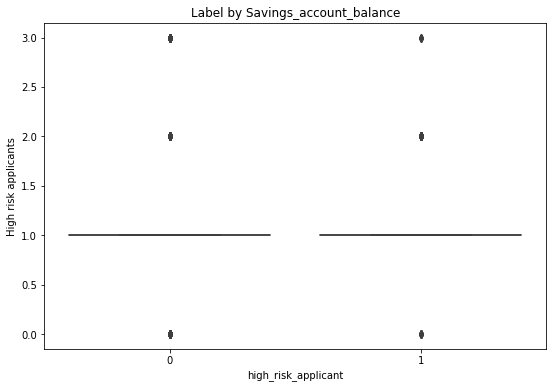

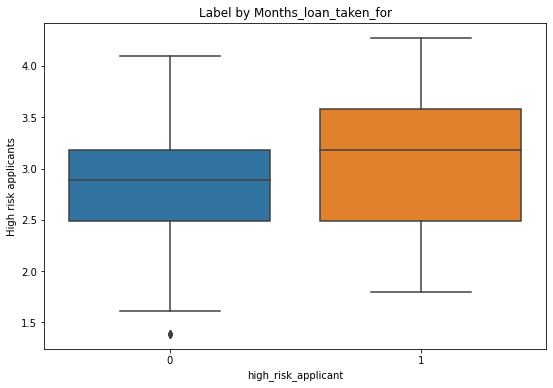

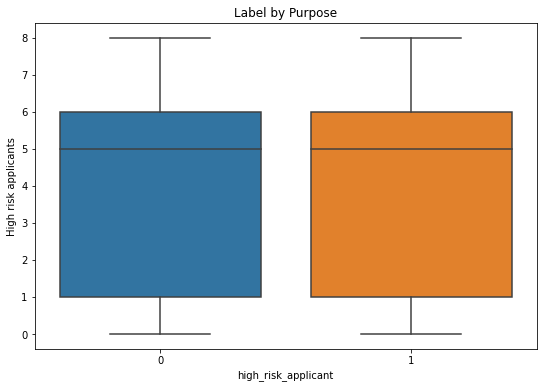

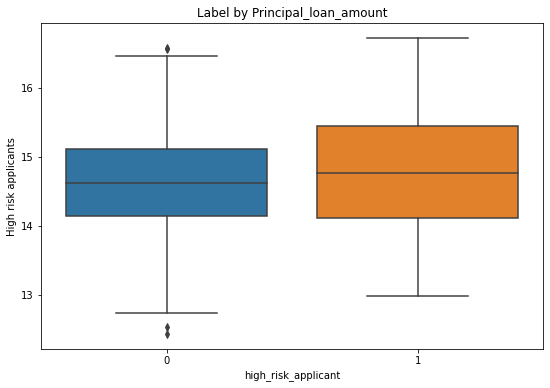

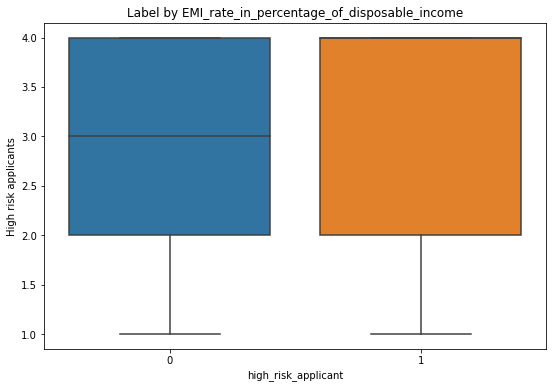

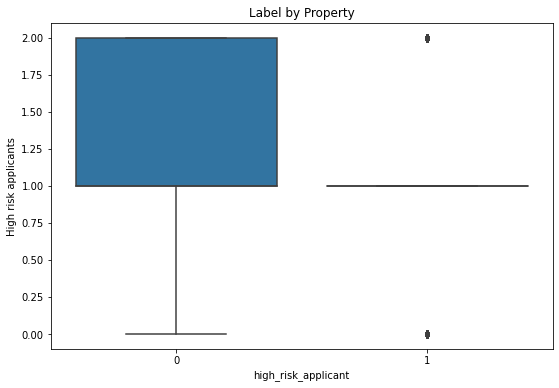

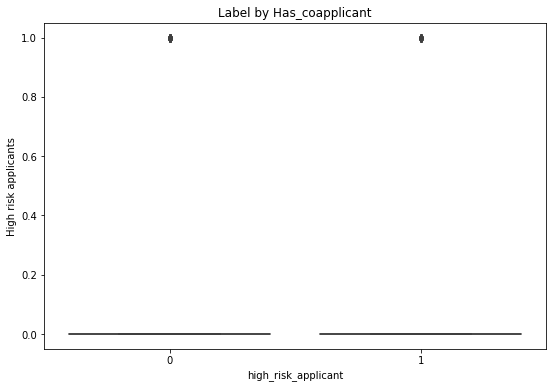

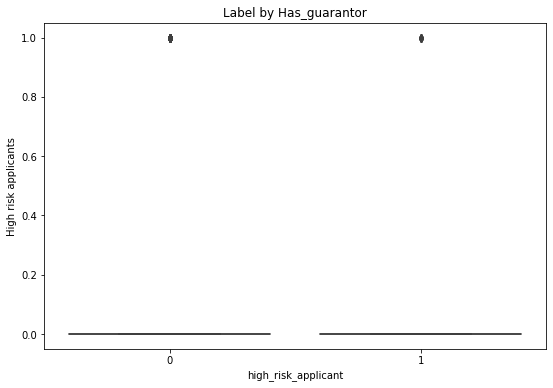

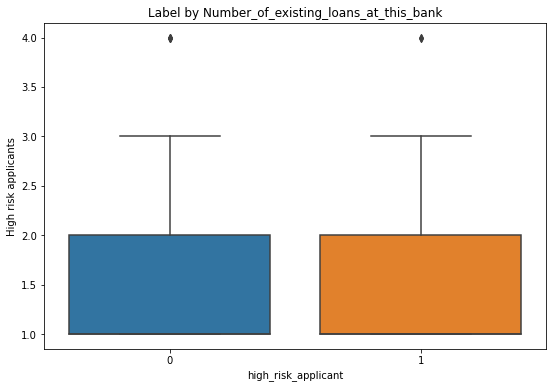

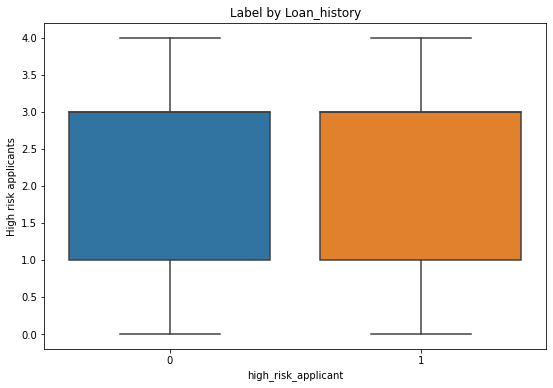

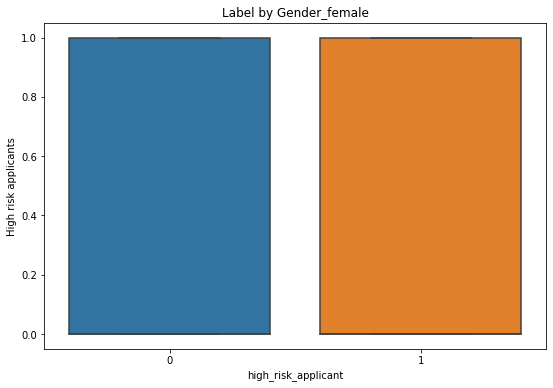

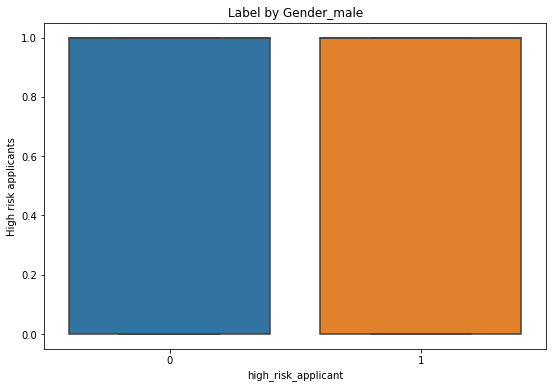

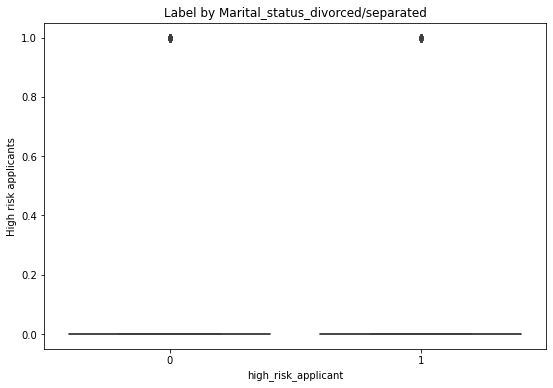

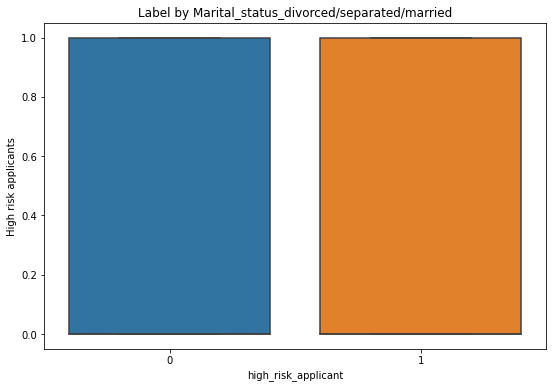

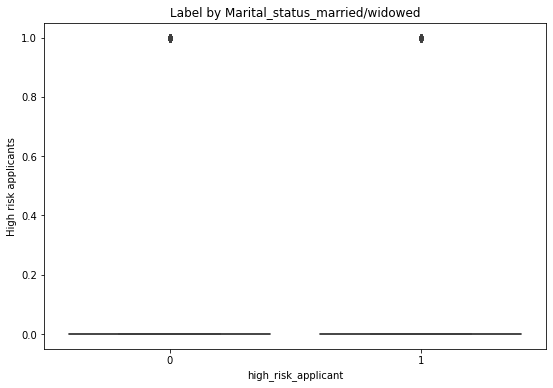

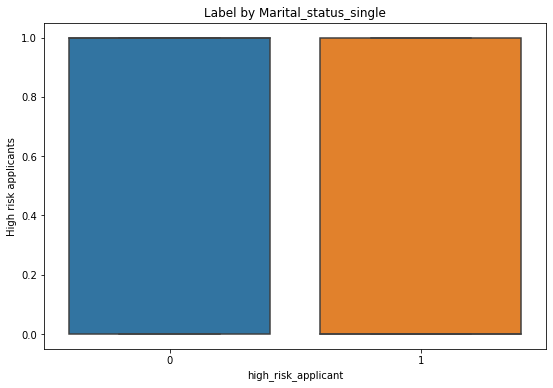

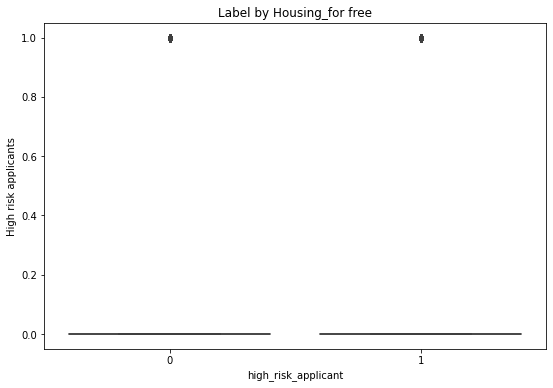

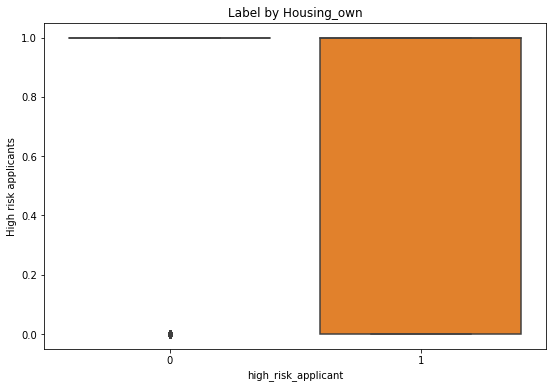

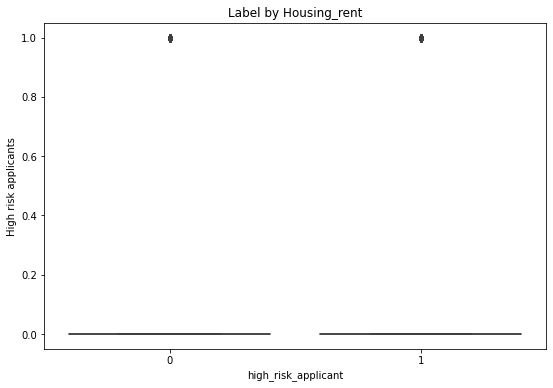

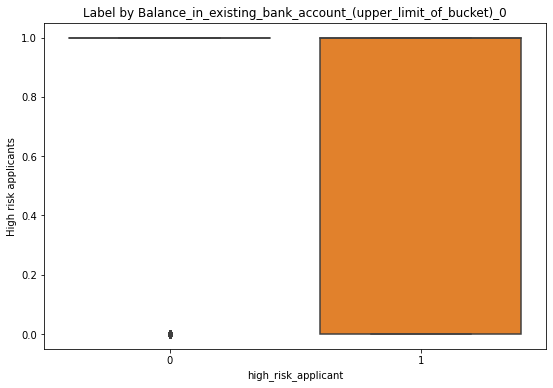

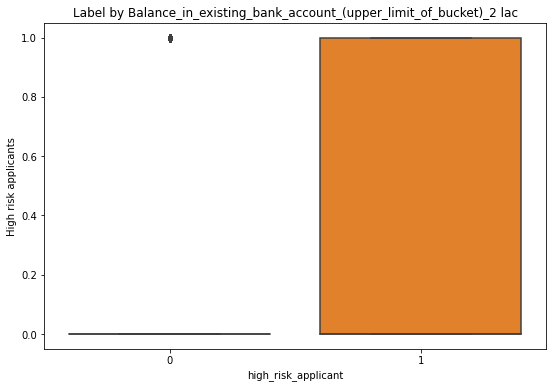

In [ ]:
#Plot a boxplot for the label by each column
for col in df3.columns:
  if(col!='high_risk_applicant'):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(df3['high_risk_applicant'], df3[col], ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("High risk applicants")
plt.show()

We are not removing any outliers because we have less outliers and the dataset is small.

#Exporting the Dataframe to csv file

In [ ]:
# converting to CSV file
df3.to_csv("loan_prediction.csv")

#Feature Engineering

##Variance Threshold Removal

Using this method we can check which columns have constant values.

In [ ]:
#Implementation Variance Threshold
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(df3)
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Observation -

In our data set, there isn't a single column with constant values.

##Feature Selection using F Classification

Seperating Dependent and Independent Variables

In [ ]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
independent = df3.drop(['high_risk_applicant'], axis = 1) #Contains independent variable
dependent = df3['high_risk_applicant'] #Contains dependent variable


In [ ]:
#Finding scores of each feature
f_scores = f_classif(independent, dependent)
f_scores

(array([1.06467737e+01, 9.07124289e-03, 8.78650037e-03, 1.07193388e+00,
        1.35761445e+01, 6.76917426e+00, 4.71115402e-01, 4.83594294e+01,
        2.57832738e+00, 1.21270926e+01, 5.25941707e+00, 6.32053888e+00,
        3.94249134e+00, 3.03244710e+00, 2.09165227e+00, 9.48999864e+00,
        5.72035018e+00, 5.72035018e+00, 2.50753769e+00, 5.72035018e+00,
        3.84726103e-01, 6.53828506e+00, 6.68246815e+00, 1.84114172e+01,
        8.66653223e+00, 1.44780209e+01, 1.44780209e+01]),
 array([1.14003707e-03, 9.24140878e-01, 9.25337421e-01, 3.00759838e-01,
        2.41391567e-04, 9.41192008e-03, 4.92633911e-01, 6.40764469e-12,
        1.08652433e-01, 5.18487534e-04, 2.20354863e-02, 1.20911496e-02,
        4.73543229e-02, 8.19229679e-02, 1.48419786e-01, 2.12253118e-03,
        1.69536764e-02, 1.69536764e-02, 1.13619657e-01, 1.69536764e-02,
        5.35226299e-01, 1.07046649e-02, 9.87747574e-03, 1.95306396e-05,
        3.31616846e-03, 1.50429966e-04, 1.50429966e-04]))

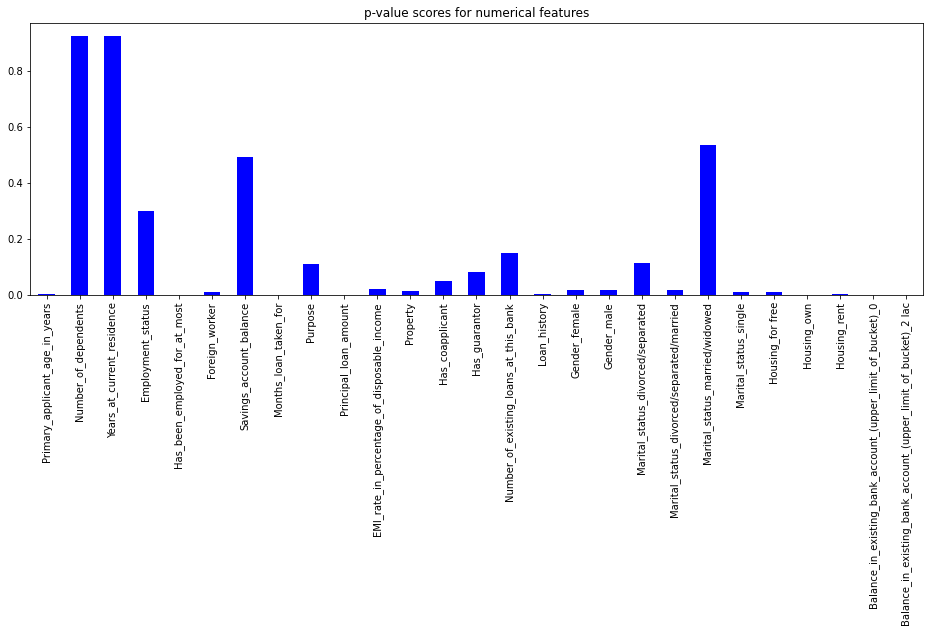

In [ ]:
#The Second array consists of p-values that we need.
p_values = pd.Series(f_scores[1], index= independent.columns)
p_values.plot(kind='bar', color='blue', figsize=(16,5))
plt.title('p-value scores for numerical features')
plt.show()

Observation -

This technique provides us with features that are not important. We can remove features with a P-value greater than 0.5.

In [ ]:
df3.drop('Number_of_dependents',axis=1,inplace=True)
df3.drop('Years_at_current_residence',axis=1,inplace=True)
df3.drop('Savings_account_balance',axis=1,inplace=True)
df3.drop('Marital_status_married/widowed',axis=1,inplace=True)



We will check with more technique to drop columns

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Primary_applicant_age_in_years                                  1000 non-null   float64
 1   Employment_status                                               1000 non-null   int64  
 2   Has_been_employed_for_at_most                                   1000 non-null   int64  
 3   Foreign_worker                                                  1000 non-null   int64  
 4   Months_loan_taken_for                                           1000 non-null   float64
 5   Purpose                                                         1000 non-null   int64  
 6   Principal_loan_amount                                           1000 non-null   float64
 7   EMI_rate_in_percentage_of_disposable_income         

#Feature Importance

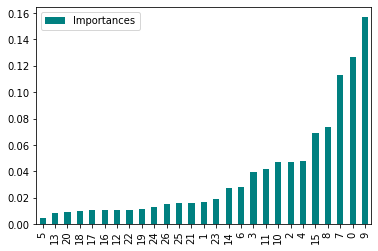

In [ ]:
#Checking Feature importance by using RandomForestClassifier


from sklearn.ensemble import RandomForestClassifier
# Create the random forest with hyperparameters
model= RandomForestClassifier(n_estimators=340)
# Fit the mmodel
model.fit(independent,dependent)
# get the importance of thr resulting features
importances= model.feature_importances_
# Create a data frame for visualization
final_df= pd.DataFrame({"Features": pd.DataFrame(independent).columns, "Importances": importances})
final_df.set_index('Importances')
# Sort in ascending order to better visualization
final_df= final_df.sort_values('Importances')
# Plot the feature importances in bars
final_df.plot.bar(color='teal')

###Correlation Matrix to check the relationship between Dependent and Independent variables

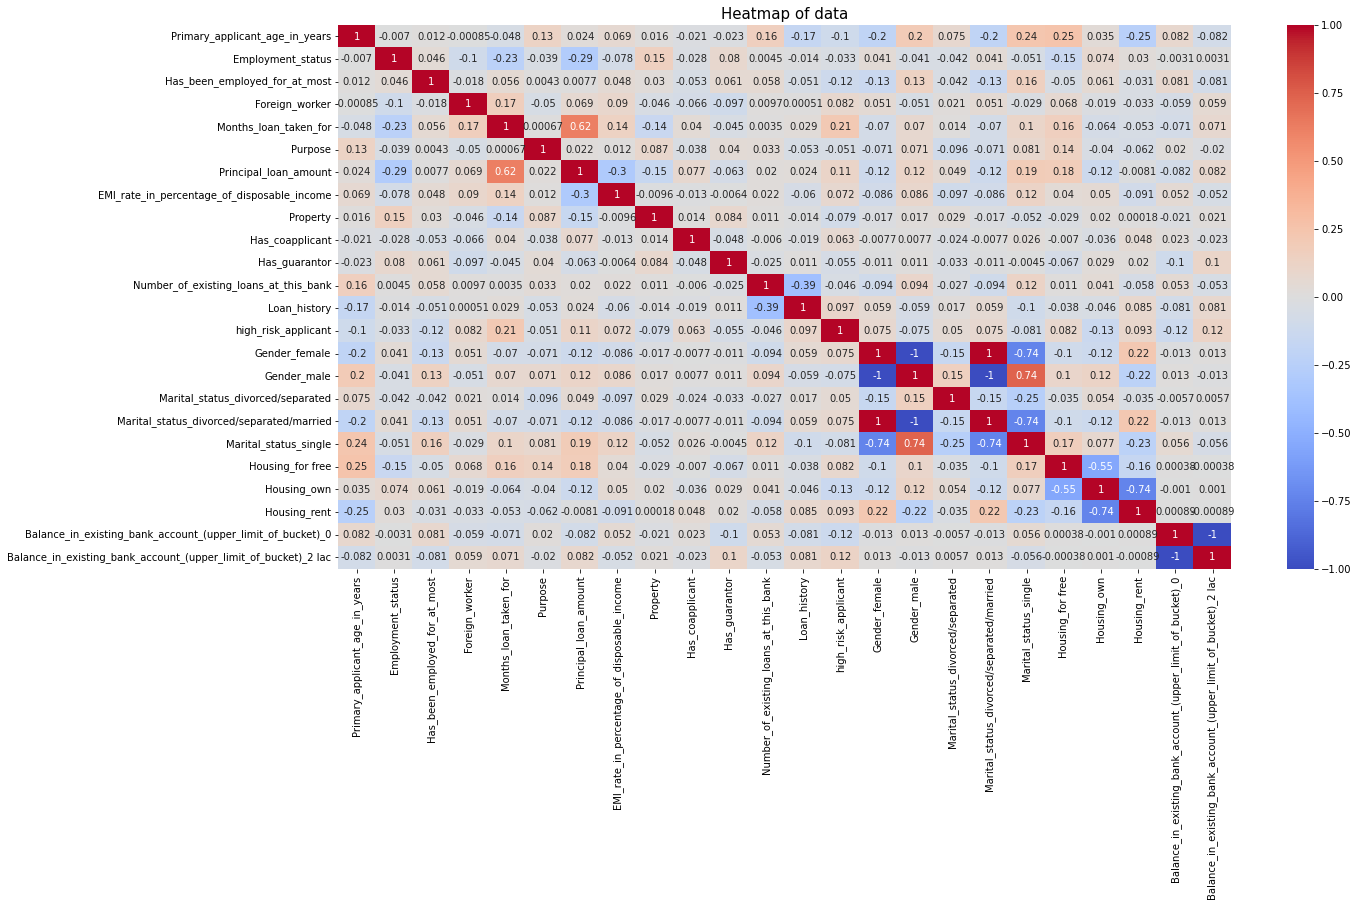

In [ ]:
#checking correlation with all columns using heat map
corrmat = df3.corr()
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(corrmat, vmin=-1,annot = True,cmap='coolwarm')
plt.title("Heatmap of data",fontsize= 15)
plt.show()

Observations based on correlation plot:-

*  'Balance_in_existing_bank_account_(upper_limit_of_bucket)_0' and 'Balance_in_existing_bank_account_(upper_limit_of_bucket)_2 lac' highly correlated so we can remove any one 

In [ ]:
#After doing some Feature engineerinf using above techniques we are dropping these columns
df3.drop('Balance_in_existing_bank_account_(upper_limit_of_bucket)_0',axis=1,inplace=True)

In [ ]:
#Checking shape after removing 3 columns
df3.shape

(1000, 23)

This is final dataset shape used for Model Training

#Split Train & Test Data

In [ ]:
#Splitting the data into train and test data

X = df3.drop(['high_risk_applicant'], axis=1) #Contain all independent variables
y = df3['high_risk_applicant'] 

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.30,random_state=0)
print(Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape)

(700, 22) (300, 22) (700,) (300,)


In [ ]:
#Make a list to get most important Features
train_col_list = list(Xtrain.columns)
train_col_list

['Primary_applicant_age_in_years',
 'Employment_status',
 'Has_been_employed_for_at_most',
 'Foreign_worker',
 'Months_loan_taken_for',
 'Purpose',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Property',
 'Has_coapplicant',
 'Has_guarantor',
 'Number_of_existing_loans_at_this_bank',
 'Loan_history',
 'Gender_female',
 'Gender_male',
 'Marital_status_divorced/separated',
 'Marital_status_divorced/separated/married',
 'Marital_status_single',
 'Housing_for free',
 'Housing_own',
 'Housing_rent',
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)_2 lac']

In [ ]:
ytrain = ytrain.values.reshape(-1,1)

In [ ]:
ytest = ytest.values.reshape(-1,1)

In [ ]:
ytrain.shape

(700, 1)

In [ ]:
ytest.shape

(300, 1)

###Handling Imbalanced data

*   One of the most significant challenges when dealing with unbalanced datasets is the metrics used to evaluate their model. Using simpler metrics, such as accuracy score, can be misleading. In a dataset with highly unbalanced classes, the classifier will always "predict" the most common class without performing any feature analysis, and while it will have a high accuracy rate, it will often be incorrect.

####Using Over Sampling Technique

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
X_ros, y_ros = ros.fit_resample(Xtrain, ytrain)

print('Original dataset shape', len(df1))
print('Resampled dataset shape', len(y_ros))
print('Resampled dataset shape', len(X_ros))
print('Resampled dataset shape', len(ytrain))
print('Resampled dataset shape', len(Xtrain))

Original dataset shape 1000
Resampled dataset shape 972
Resampled dataset shape 972
Resampled dataset shape 700
Resampled dataset shape 700


Observation-

The dataset has now been balanced using the oversampling technique, and it is ready for training the model.

##Feature Scaling

In [ ]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_ros = scaler.fit_transform(X_ros)
Xtest = scaler.transform(Xtest)

Scaled down the train varible which makes easy for a model to learn.

#Model Training

In [ ]:
#Defining all these models
models = [
           ['LinearClassifier: ', Perceptron()],
           ['LogisticRegression:', LogisticRegression()],
           ['GNB: ', GaussianNB()],
           ['BNB: ', BernoulliNB()],
           ['KNeighborsClassifier: ', KNeighborsClassifier()],
           ['DecisionTreeClassifier: ', DecisionTreeClassifier()],
           ['RandomForestClassifier ',RandomForestClassifier()],
           ['GradientBoostingClassifier: ', GradientBoostingClassifier()] ,
           ['XGBRFClassifier: ', XGBRFClassifier()],
           ['AdaBoostClassifier: ',AdaBoostClassifier()],
           ['LgbmClassifier: ',ltb.LGBMClassifier()]
         ]

In [ ]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
      curr_model_data = {}
      curr_model.random_state = 42
      curr_model_data["Name"] = name
      start = time.time()
      curr_model.fit(X_ros,y_ros)
      end = time.time()
      y_train_pred=curr_model.predict(X_ros)
      y_test_pred= curr_model.predict(Xtest)
      curr_model_data["Train_Time"] = end - start
      curr_model_data["Train accuracy"] =accuracy_score(y_ros,y_train_pred )
      curr_model_data["Test accuracy"] =accuracy_score(ytest, y_test_pred)
      curr_model_data["Train precision"] = precision_score(y_ros,y_train_pred)
      curr_model_data["Test precision"] = precision_score(ytest,y_test_pred)
      curr_model_data["Train recall"] = recall_score(y_ros,y_train_pred)
      curr_model_data["Test recall"] = recall_score(ytest,y_test_pred)
      curr_model_data["Train f1 score"] = f1_score(y_ros,y_train_pred)
      curr_model_data["Test f1 score"] = f1_score(ytest,y_test_pred)
      curr_model_data['Train ROC-AUC'] = roc_auc_score(y_ros,y_train_pred)
      curr_model_data["Test ROC-AUC"] = roc_auc_score(ytest,y_test_pred)
      model_data.append(curr_model_data)

In [ ]:
results = pd.DataFrame(model_data)
results

,Name,Train_Time,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score,Train ROC-AUC,Test ROC-AUC
0,LinearClassifier:,0.003207,0.508230,0.303333,0.504149,0.291525,1.000000,1.000000,0.670345,0.451444,0.508230,0.511682
1,LogisticRegression:,0.020037,0.662551,0.633333,0.663900,0.411765,0.658436,0.651163,0.661157,0.504505,0.662551,0.638666
2,GNB:,0.001469,0.634774,0.616667,0.621072,0.409938,0.691358,0.767442,0.654333,0.534413,0.634774,0.661758
3,BNB:,0.002528,0.581276,0.580000,0.588367,0.363014,0.541152,0.616279,0.563773,0.456897,0.581276,0.590850
4,KNeighborsClassifier:,0.000597,0.790123,0.580000,0.762082,0.338710,0.843621,0.488372,0.800781,0.400000,0.790123,0.552597
5,DecisionTreeClassifier:,0.006698,1.000000,0.626667,1.000000,0.358696,1.000000,0.383721,1.000000,0.370787,1.000000,0.554010
6,RandomForestClassifier,0.244861,1.000000,0.693333,1.000000,0.459459,1.000000,0.395349,1.000000,0.425000,1.000000,0.604216
7,GradientBoostingClassifier:,0.191375,0.884774,0.693333,0.883197,0.470588,0.886831,0.558140,0.885010,0.510638,0.884774,0.652902
8,XGBRFClassifier:,0.065541,0.738683,0.633333,0.719697,0.413043,0.781893,0.662791,0.749507,0.508929,0.738683,0.642143
9,AdaBoostClassifier:,0.099810,0.738683,0.676667,0.741667,0.452991,0.732510,0.616279,0.737060,0.522167,0.738683,0.658607


Observation -

**Hurrah! Here are the results of all the models.** The best evaluation metric is recall, and we can see that Boosting Algorithms are performing well in this case.

However, we can perform hyperparameter tuning on these models to determine the optimum model.

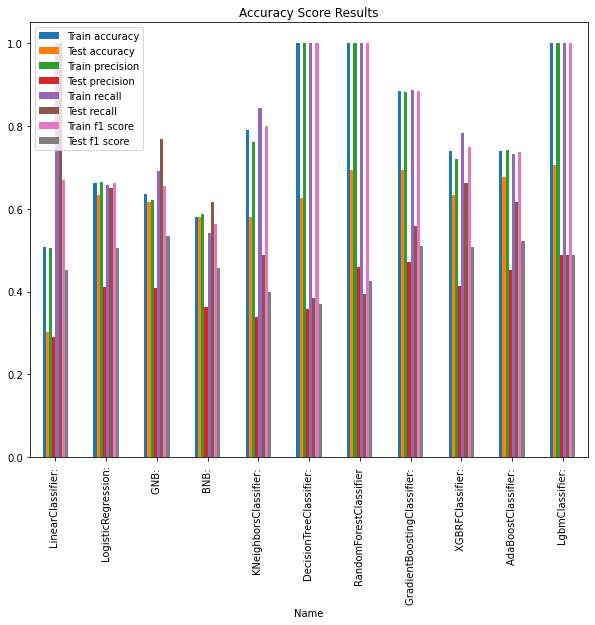

In [ ]:
#Draw plot for above models metrices
results.plot(x="Name", y=['Train accuracy' , 'Test accuracy' ,'Train precision','Test precision','Train recall','Test recall','Train f1 score','Test f1 score'], kind="bar" , title = 'Accuracy Score Results' , figsize= (10,8)) 

Observation -

RandomForestClassifier is performing well in terms of accuracy.

##Confusion matrix for better Understanding

In [ ]:
model_data2 = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_ros,y_ros)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["conf_mat"] = confusion_matrix(ytest,[round(value) for value in (curr_model.predict(Xtest))])
    model_data2.append(curr_model_data)

In [ ]:
Conf_Mat_df= pd.DataFrame(model_data2)
Conf_Mat_df

,Name,Train_Time,conf_mat
0,LinearClassifier:,0.002681,"[[5, 209], [0, 86]]"
1,LogisticRegression:,0.031713,"[[134, 80], [30, 56]]"
2,GNB:,0.001342,"[[119, 95], [20, 66]]"
3,BNB:,0.001978,"[[121, 93], [33, 53]]"
4,KNeighborsClassifier:,0.000538,"[[132, 82], [44, 42]]"
5,DecisionTreeClassifier:,0.007290,"[[155, 59], [53, 33]]"
6,RandomForestClassifier,0.274786,"[[174, 40], [52, 34]]"
7,GradientBoostingClassifier:,0.190507,"[[160, 54], [38, 48]]"
8,XGBRFClassifier:,0.063646,"[[133, 81], [29, 57]]"
9,AdaBoostClassifier:,0.111681,"[[150, 64], [33, 53]]"


Observation -

We can observe from the confusion matrix that Gaussian Naive Bayes and XGB Classifier are giving some recall score.

###Let's perform Cross Validation and Hyper parameter tuning on these models to get better results.

##Hyperparameter Tuning 





In [ ]:
#Cross validation and hyperparameter tuning
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg_bayes = BayesSearchCV(estimator=logreg ,
                           search_spaces = {
                          "C":np.logspace(-3,3,7),
                           "penalty":["l2"]
                        },
                       cv = 5, verbose=2, scoring='accuracy', n_iter=10)    

logreg_bayes.fit(X_ros,y_ros)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=LogisticRegression(), n_iter=10,
              scoring='accuracy',
              search_spaces={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                             'penalty': ['l2']},
              verbose=2)

In [ ]:
logreg_bayes.best_params_

OrderedDict([('C', 100.0), ('penalty', 'l2')])

In [ ]:
logreg_bayes.best_estimator_

LogisticRegression(C=100.0)

In [ ]:
#make prediction
train_pred=logreg_bayes.best_estimator_.predict(X_ros)
test_pred=logreg_bayes.best_estimator_.predict(Xtest)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_ros, train_pred)
test_accuracy = accuracy_score(ytest, test_pred)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_ros, train_pred)
test_accuracy = accuracy_score(ytest, test_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.6563786008230452
The accuracy on test dataset is 0.63


In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_ros, train_pred)
test_cm = confusion_matrix(ytest, test_pred)

In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_ros, train_pred)
test_cm = confusion_matrix(ytest, test_pred)

In [ ]:
train_cm
test_cm

array([[134,  80],
       [ 31,  55]])

In [ ]:
print(classification_report(y_ros,train_pred))
print("\n")
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       0.65      0.66      0.66       486
           1       0.66      0.65      0.65       486

    accuracy                           0.66       972
   macro avg       0.66      0.66      0.66       972
weighted avg       0.66      0.66      0.66       972



              precision    recall  f1-score   support

           0       0.81      0.63      0.71       214
           1       0.41      0.64      0.50        86

    accuracy                           0.63       300
   macro avg       0.61      0.63      0.60       300
weighted avg       0.70      0.63      0.65       300



Observation -

The Logistic Regression model is robust, with no overfitting or underfitting, although providing a lower accuracy and recall score. We can try some methods to improve these scores.

In [ ]:
rf = RandomForestClassifier(random_state=40)
#Cross validation and hyperparameter tuning
rf_bayes = BayesSearchCV(estimator= rf,
                         search_spaces = {
                          'max_depth': Integer(2,100),
                          'min_samples_leaf': Integer(1,100),
                          'min_samples_split': Integer(2,100),
                          'n_estimators': Integer(1,140),
                          'max_features': ["auto", "sqrt", "log2"]
                        },
                       cv = 5, verbose=2, scoring='accuracy',n_iter=10)

rf_bayes.fit(X_ros,y_ros)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=60, max_features=log2, min_samples_leaf=6, min_samples_split=56, n_estimators=71; total time=   0.1s
[CV] END max_depth=60, max_features=log2, min_samples_leaf=6, min_samples_split=56, n_estimators=71; total time=   0.1s
[CV] END max_depth=60, max_features=log2, min_samples_leaf=6, min_samples_split=56, n_estimators=71; total time=   0.1s
[CV] END max_depth=60, max_features=log2, min_samples_leaf=6, min_samples_split=56, n_estimators=71; total time=   0.1s
[CV] END max_depth=60, max_features=log2, min_samples_leaf=6, min_samples_split=56, n_estimators=71; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=81, max_features=auto, min_samples_leaf=30, min_samples_split=54, n_estimators=59; total time=   0.1s
[CV] END max_depth=81, max_features=auto, min_samples_leaf=30, min_samples_split=54, n_estimators=59; total time=   0.1s
[CV] END max_depth=81, max_features=auto

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40),
              n_iter=10, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': Integer(low=1, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=140, prior='uniform', transform='normalize')},
              verbose=2)

In [ ]:
rf_bayes.best_params_

OrderedDict([('max_depth', 60),
             ('max_features', 'log2'),
             ('min_samples_leaf', 6),
             ('min_samples_split', 56),
             ('n_estimators', 71)])

In [ ]:
rf_bayes.best_estimator_

RandomForestClassifier(max_depth=60, max_features='log2', min_samples_leaf=6,
                       min_samples_split=56, n_estimators=71, random_state=40)

In [ ]:
#make prediction
train_pred=rf_bayes.best_estimator_.predict(X_ros)
test_pred=rf_bayes.best_estimator_.predict(Xtest)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_ros, train_pred)
test_accuracy = accuracy_score(ytest, test_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8076131687242798
The accuracy on test dataset is 0.6666666666666666


In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_ros, train_pred)
test_cm = confusion_matrix(ytest, test_pred)

In [ ]:
train_cm
test_cm

array([[144,  70],
       [ 30,  56]])

In [ ]:
print(classification_report(y_ros,train_pred))
print("\n")
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       486
           1       0.80      0.82      0.81       486

    accuracy                           0.81       972
   macro avg       0.81      0.81      0.81       972
weighted avg       0.81      0.81      0.81       972



              precision    recall  f1-score   support

           0       0.83      0.67      0.74       214
           1       0.44      0.65      0.53        86

    accuracy                           0.67       300
   macro avg       0.64      0.66      0.64       300
weighted avg       0.72      0.67      0.68       300



Observation -

Random Forest is overfitting for this model when compared to other models. As a result, we will not consider this model for our dataset.

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
#Cross validation and hyperparameter tuning
xgb_bayes = BayesSearchCV(estimator= xgb,
                         search_spaces = {
                          'max_depth':Integer(4,100) ,
                          'num_leaves': Integer(3,200),
                          'n_estimators': Integer(3,200),
                          'min_split_gain': Integer(1.0,10.0),
                          'n_jobs': Integer(1,30),
                        },
                       cv = 5, verbose=2, scoring='accuracy', n_iter=10)

xgb_bayes.fit(X_ros,y_ros)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=71, min_split_gain=6, n_estimators=136, n_jobs=18, num_leaves=102; total time=   1.7s
[CV] END max_depth=71, min_split_gain=6, n_estimators=136, n_jobs=18, num_leaves=102; total time=   1.6s
[CV] END max_depth=71, min_split_gain=6, n_estimators=136, n_jobs=18, num_leaves=102; total time=   1.7s
[CV] END max_depth=71, min_split_gain=6, n_estimators=136, n_jobs=18, num_leaves=102; total time=   1.6s
[CV] END max_depth=71, min_split_gain=6, n_estimators=136, n_jobs=18, num_leaves=102; total time=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=96, min_split_gain=1, n_estimators=105, n_jobs=8, num_leaves=20; total time=   0.7s
[CV] END max_depth=96, min_split_gain=1, n_estimators=105, n_jobs=8, num_leaves=20; total time=   0.7s
[CV] END max_depth=96, min_split_gain=1, n_estimators=105, n_jobs=8, num_leaves=20; total time=   0.7s
[CV] END max_depth=96, min_split_gain=1, n_estim

BayesSearchCV(cv=5, estimator=XGBClassifier(), n_iter=10, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=4, high=100, prior='uniform', transform='normalize'),
                             'min_split_gain': Integer(low=1.0, high=10.0, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=3, high=200, prior='uniform', transform='normalize'),
                             'n_jobs': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=3, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [ ]:
xgb_bayes.best_params_

OrderedDict([('max_depth', 96),
             ('min_split_gain', 1),
             ('n_estimators', 105),
             ('n_jobs', 8),
             ('num_leaves', 20)])

In [ ]:
xgb_bayes.best_estimator_

XGBClassifier(max_depth=96, min_split_gain=1, n_estimators=105, n_jobs=8,
              num_leaves=20)

In [ ]:
#make prediction
train_pred=xgb_bayes.best_estimator_.predict(X_ros)
test_pred=xgb_bayes.best_estimator_.predict(Xtest)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_ros, train_pred)
test_accuracy = accuracy_score(ytest, test_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.7066666666666667


In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_ros, train_pred)
test_cm = confusion_matrix(ytest, test_pred)

In [ ]:
train_cm
test_cm

array([[173,  41],
       [ 47,  39]])

In [ ]:
print(classification_report(y_ros,train_pred))
print("\n")
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       486

    accuracy                           1.00       972
   macro avg       1.00      1.00      1.00       972
weighted avg       1.00      1.00      1.00       972



              precision    recall  f1-score   support

           0       0.79      0.81      0.80       214
           1       0.49      0.45      0.47        86

    accuracy                           0.71       300
   macro avg       0.64      0.63      0.63       300
weighted avg       0.70      0.71      0.70       300




XGBoost is underfitting for this model when compared to other models. As a result, we will not consider this model for our dataset.

#Observation -

The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Logistic Regression and XGBClassifier models performed better than other models.

In comparison to both models, the Logistic Regression model performed well on the most essential evaluation metric, **'Recall,' with values of 0.65 on train data and 0.64 on test data.** As a result, we conclude **Logistic Regression is the best model for this dataset.**

#Conclusion -



Our client is an finanical firm that has supplied Loans to its customers. They now need assistance in developing a model to predict if a person will default on the loan based on the loan and personal information provided.

Building a model to predict if a person is high risk applicant to issue the Loan is extremely beneficial to the company because they can then plan communication strategy to reach out to those customers and optimise its business model and revenue.

Now, we have information about demographics (gender, age, employment status  Bank Balance), Loans (Months_loan_taken_for, Loan_history, umber_of_existing_loans_at_this_bank) and so on to predict whether the customer would be interested in Vehicle insurance.

0 = Low credit risk i.e high chance of paying back the loan amount

1 = High credit risk i.e low chance of paying back the loan amount

Key points:


*   There are more male applicants. Majority of high risk applicants are also male candidates.
* We observed that applicants between the ages of 25 and 40 are more likely to be high risk, indicating that young individuals are smart enough to cheat. data.
*   Majority of High risk applicants are skilled workers with 1 - 4 years of experience.
*   Individuals with low balance are more likely to be high risk applicants.
*   Loans with less than two appear to be high risk applicants.
*   We can see that individuals who pay accurately are high risk applicants, implying that they will pay correctly for a few days and then cheat.
*   Applicants who are approved for 12 months, 24 months, or 36 months are considered high risk.
*   Applicants with a high EMI rate of percentage are more likely to be labelled high risk.
*   Banks have more high-risk applicants than stores.





###Improvements:

1. By using a marketing and advertising approach, we can reduce the gender gap.

2. Before approving a loan, we must first check the credit score.

2. We can provide loan for an individual who has better salary record.

3. Ask them Include a co-applicant with a better credit score.

4. Ask them to present a guarantor for the loan.



#Lastly, Steps for Model Deployment:

The simplest way to deploy a machine learning model is to create a web service for prediction. For this we can use Flask web framework to wrap a simple Classifier.



To create a machine learning web service, you need at least three steps.

The environment where we deploy the application is often different from where we train them. Training usually requires a different set of resources. 

The following is an example of how we can store the trained model in a pickle file.

from sklearn.externals import joblib

joblib.dump(classifier, 'classifier.pkl')

Finally, we can serve the persisted model using a web framework. The following code creates a REST API using Flask. This file is hosted in a different environment, often in a cloud server.

from flask import Flask

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
     json_ = request.json
     query_df = pd.DataFrame(json_)
     query = pd.get_dummies(query_df)
    
     classifier = joblib.load('classifier.pkl')
     prediction = classifier.predict(query)
     return jsonify({'prediction': list(prediction)})


if __name__ == '__main__':
     app.run(port=8080)

The above code takes input in a POST request through https://localhost:8080/predict and returns the prediction in a JSON response.